In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import BallTree, KDTree
import time
#

In [4]:
# #Training set
train_data = np.load(r'C:\Users\diego\Downloads\train_data.npy')
train_labels = np.load(r'C:\Users\diego\Downloads\train_labels.npy')
#
# #Test set
test_data = np.load(r'C:\Users\diego\Downloads\test_data.npy')
test_labels = np.load(r'C:\Users\diego\Downloads\test_labels.npy')

In [5]:
# #Print out their dimensions
#print('Training dataset dimensions:', np.shape(train_data))
print('Number of training labels:', len(train_labels))
#print('Test dataset dimensions:', np.shape(test_data))
print('Number of testing labels:', len(test_labels))

Number of training labels: 7500
Number of testing labels: 1000


In [6]:
# #Number of examples of each digit
train_digits, train_counts = np.unique(train_labels,return_counts=True)
#print('Training set distribution:')
#print(dict(zip(train_digits,train_counts)))
#
test_digits, test_counts = np.unique(test_labels,return_counts=True)
#print('Testing set distribution:')
#print(dict(zip(test_digits,test_counts)))

In [8]:
# #Define function that displays digit given its vector representation
def show_digit(x):
     plt.axis('off')
     plt.imshow(x.reshape((28,28)),cmap= plt.cm.gray)
     plt.show()
     return
#
# #Define function that takes index into a particular data set(Train or test) and displays image
def vis_image(index,dataset='train'):
     if(dataset=='train'):
         show_digit(train_data[index])
         label = train_labels[index]
     else:
         show_digit(test_data[index])
         label = test_labels[index]
     print('Label '+ str(label))
     return

In [9]:
# #View the first data point in the training set
#vis_image(4,'train')
# #View the first data point in the testing set
#vis_image(7,'train')
#

In [10]:
# #Computes squared Euclidean distance between two vectors
def squared_dist(x,y):
     return np.sum(np.square(x-y))
# #Compute distance between seven and a one in our training set
#print('Distance from 7 to 1: ', squared_dist(train_data[4,: ],train_data[5,: ]))
#print('Distance from 7 to 2: ',squared_dist(train_data[4,],train_data[1,]))
#print('Distance from 7 to 7: ',squared_dist(train_data[4,],train_data[7,]))
#

In [11]:
# #Computing nearest neighbors
# #Takes a vector x and returns the index of its nearest neighbor in train_data
# #Which will indicate the nearest number image in this case
def find_NN(x):
#Compute distances from x to every row in train_data
     distances =[squared_dist(x,train_data[i,:]) for i in range(len(train_labels))]
     return np.argmin(distances) #minimum distance
#
# #Takes a vector x and returns the class of its nearest neighbor in train_data
def NN_classifier(x):
     index = find_NN(x)
     #Return its class
     return train_labels[index]

A sucess case: 
NN classification:  0
True label: 0
The test image:


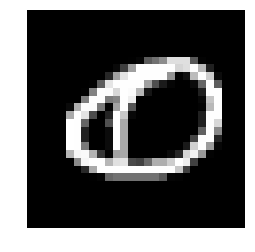

Label 0
The corresponding nearest neighbor image:


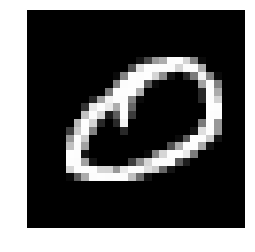

Label 0


In [12]:
# ##A successful case
print('A sucess case: ')
print('NN classification: ', NN_classifier(test_data[0,]))
print('True label:' , test_labels[0])
print('The test image:')
vis_image(0,'test')
print('The corresponding nearest neighbor image:')
vis_image(find_NN(test_data[0, ]),'train')

In [ ]:
#
#THERE ARE ALSO FAILURE CASES
# # #1
# # # ## Predict on each test data point (and time it!)
# # # t_before = time.time()
# # # test_predictions = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]
# # # t_after = time.time()
# # #
# # # ## Compute the error
# # # err_positions = np.not_equal(test_predictions, test_labels)
# # # error = float(np.sum(err_positions))/len(test_labels)
# # #
# # # print("Error of nearest neighbor classifier: ", error)
# # # print("Classification time (seconds): ", t_after - t_before)
# #
# # #Faster
# # #2
# # #Build nearest neighbor structure on training data
# # t_before = time.time()
# # ball_tree = BallTree(train_data)
# # t_after = time.time()
# #
# # #Compute training time
# # t_training = t_after-t_before
# # print('Time to build data structure(seconds):', t_training)
# #
# # #Get the nearest neighbors predictions on testing data
# # t_before = time.time()
# # test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
# # ball_tree_predictions = train_labels[test_neighbors]
# # t_after = time.time()
# #
# # #Compute testing time
# # t_testing = t_after-t_before
# # print('Time to classify test set (seconds):', t_testing)
# #
# # #3
# # ## Build nearest neighbor structure on training data
# # t_before = time.time()
# # kd_tree = KDTree(train_data)
# # t_after = time.time()
# #
# # ## Compute training time
# # t_training = t_after - t_before
# # print("Time to build data structure (seconds): ", t_training)
# #
# # ## Get nearest neighbor predictions on testing data
# # t_before = time.time()
# # test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
# # kd_tree_predictions = train_labels[test_neighbors]
# # t_after = time.time()
# #
# # ## Compute testing time
# # t_testing = t_after - t_before
# # print("Time to classify test set (seconds): ", t_testing)
# #
# # ## Verify that the predictions are the same
# # print("KD tree produces same predictions as above? ", np.array_equal(kd_tree_predictions))
# #